In [8]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.api import OLS, add_constant
import time
from scipy.stats import norm

from vax_sims_LHS_samples import *
from plot_utils import *
# from util_functions import *
# from uncertainty_analysis import *
# from sim_helper_functions import *

from fall_2021_projection_utils import aggregate_trajs_student_only

# Code to load and process simulation data 

In [2]:
base_folder = 'posterior_test_frequency_sims_1633721757/'

def get_fname_params(fname):
    fname_without_ext = fname.split('.')[0]
    fname_list = fname_without_ext.split('_')
    test_policy_num = int(fname_list[2])
    vax_rate_idx = int(fname_list[5])
    return test_policy_num, vax_rate_idx

sim_trajs = {}
sim_uncertainty_points = {}
sim_point_idxs = {}


count = 0

for fname in os.listdir(base_folder):
    with open(os.path.join(base_folder, fname), "rb") as fhandle:
        policy_num, vax_idx = get_fname_params(fname)
        posterior_point_idxs, posterior_points, inf_trajs_by_group = dill.load(fhandle)
        sim_trajs[policy_num, vax_idx] = inf_trajs_by_group
        sim_uncertainty_points[policy_num, vax_idx] = posterior_points
        sim_point_idxs[policy_num, vax_idx] = posterior_point_idxs
        
        count += 1
        if count % 50 == 0:
            print("loaded {} sim outputs".format(count))


In [30]:
def compute_quantiles(sim_trajs, quantiles=[0.25, 0.5, 0.75]):
    quantile_results = {q:{} for q in quantiles}
    for sim_type in sim_trajs:
        inf_matrix = np.array(sim_trajs[sim_type])
        final_student_infxns = np.sum(inf_matrix[:,:-2,-1], axis=1)
        quantile_results[sim_type] = []
        for q in quantiles:
            quantile_results[q][sim_type] = np.quantile(final_student_infxns, q)
    return quantile_results

quantile_results = compute_quantiles(sim_trajs, quantiles=[0.1,0.5,0.9])

# Plotting code

In [28]:
from test_policies import policy_labels

policy_nums = [1,2,3,4,5,6,7,8]

assert(len(policy_nums) == 8)

vax_rate_idxs = [0,1,2,3]

print(policy_nums)
print(vax_rate_idxs)

def get_vax_rate_results(policy_num, q):
    return [quantile_results[q][(policy_num, vax_idx)] for vax_idx in vax_rate_idxs]


[1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3]


In [31]:
policy_labels

{1: '0x/week vax, 1x/week unvax',
 2: '0x/week vax, 2x/week unvax',
 3: '1x/week vax, 1x/week unvax',
 4: '1x/week vax, 2x/week unvax',
 5: '2x/week vax, 2x/week unvax',
 6: '1x/week others, 2x/week greek, unvax',
 7: '3x/week greek, 2x/week unvax, 1x/week vax',
 8: 'No testing'}

In [32]:
policy_nums = [8,5,3]

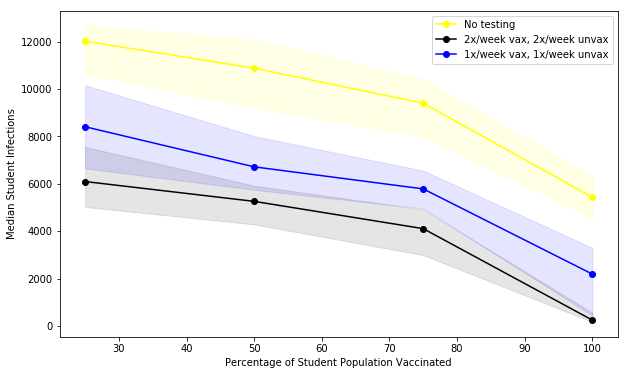

In [36]:
from test_policies import policy_labels
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
vax_rates_x = [25, 50, 75, 100]


colours = ['orange', 'green', 'blue', 'purple', 'black', 'gray', 'red', 'yellow']

for policy_num in policy_nums:
    colour = colours[policy_num-1]
    plt.plot(vax_rates_x, get_vax_rate_results(policy_num, 0.5), color=colour, 
             marker='o', label=policy_labels[int(policy_num)])
    plt.fill_between(vax_rates_x, 
                     y1=get_vax_rate_results(policy_num, 0.1), 
                     y2=get_vax_rate_results(policy_num, 0.9),
                     color=colour, alpha=0.1)
    
plt.xlabel("Percentage of Student Population Vaccinated")
plt.ylabel("Median Student Infections")
plt.legend()
plt.show()

In [37]:
from test_policies import policy_labels
import matplotlib.pyplot as plt
%matplotlib inline

def drop_vax_99(l):
    return l[0:3] + [l[4]]

plt.figure(figsize=(10,6))
vax_rates_x = [25, 50, 75, 99, 100]


colours = ['orange', 'green', 'blue', 'purple', 'black', 'gray', 'red', 'yellow']

for policy_num, colour in policy_nums:
    colour = colours[policy_num-1]
    plt.plot(drop_vax_99(vax_rates_x), drop_vax_99(median_inf_50[policy_num]), color=colour, 
             marker='o', label=policy_labels[int(policy_num)])
    plt.fill_between(drop_vax_99(vax_rates_x), 
                     y1=drop_vax_99(median_inf_25[policy_num]), 
                     y2=drop_vax_99(median_inf_75[policy_num]),
                     color=colour, alpha=0.1)
    
plt.xlabel("Percentage of Student Population Vaccinated")
plt.ylabel("Median Student Infections")
plt.legend()
plt.show()

TypeError: 'int' object is not iterable